In [6]:
import requests
import io, zipfile

import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from zipfile import ZipFile

from segysak.segy import segy_loader
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead


In [9]:
download_link = 'https://gsq-horizon.s3-ap-southeast-2.amazonaws.com/SEISMIC/2D_Surveys/2010-2019/95332_KOGAN_SEISMIC_SURVEY_2012/95332_PROCESSED.ZIP'
download_response = requests.get(download_link)

In [10]:
print(len(download_response.content))
zips = zipfile.ZipFile(io.BytesIO(download_response.content))

981394400


In [11]:
zips.namelist()

['KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SDU10632TA_242418.sgy',
 'KOGAN_SEISMIC_SURVEY_2012_KOG12-03_FINAL_FILTERED_MIGRATED_SDU09914TA_218668.sgy',
 'KOGAN_SEISMIC_SURVEY_2012_KOG12-05_FINAL_MIGRATED_SDU10632TA_242420.sgy',
 'KOGAN_SEISMIC_SURVEY_2012_KOG12-06_FINAL_FILTERED_MIGRATED_SDU09914TA_218667.sgy',
 'Other_SEGY/',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-05_FINAL_MIGRATED_SDU10632TA_243419.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-06_FINAL_MIGRATED_SDU10632TA_243325.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-03_FINAL_MIGRATED_SDU10632TA_243323.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-05_FINAL_MIGRATED_SDU10912TA_131955.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-06_FINAL_FILTERED_MIGRATED_SDU09914TA_234568.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-06_FINAL_FILTERED_MIGRATED_SDU09914TA_226353.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SURVEY_2012_KOG12-05_UNFILTERED_MIGRATED_SDU10632TA_242246.sgy',
 'Other_SEGY/KOGAN_SEISMIC_SUR

In [38]:
segy_file = zips.read('KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SDU10632TA_242418.sgy')

In [103]:
#byte = segy_file.read(4)
#byte = open(segy_file, 'rb')
#stream_data = segy_file.read()
import struct
with zips.open('KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SDU10632TA_242418.sgy') as myfile:
    b = struct.unpack('<3200s', bytearray(myfile.read(3200)))
    print(b[0].decode('cp037'))

C ARROW ENERGY                                                                  C 2012 KOGAN 2D SEISMIC SURVEY                                                  C LINE  KOG12-02                                                                C FILTERED SPECTRALLY ENHANCED MIGRATED STACK                                   C                                                                               C PROCESSED BY VELSEIS PROCESSING PTY LTD                                       C SEGY CREATED 05/03/2013                                                       C                                                                               C SP 1000-1513 CDP 2000-3026                                                    C DATUM 350M ASL                                                                C REPLACEMENT VELOCITY 2800M/S                                                  C SURVEY GDA 1994 ZONE 55                                                       C                                       

In [75]:
len(b)

1

In [99]:
encodings = ['ascii',
 'big5',
 'big5hkscs',
 'cp037',
 'cp273',
 'cp424',
 'cp437',
 'cp500',
 'cp720',
 'cp737',
 'cp775',
 'cp850',
 'cp852',
 'cp855',
 'cp856',
 'cp857',
 'cp858',
 'cp860',
 'cp861',
 'cp862',
 'cp863',
 'cp864',
 'cp865',
 'cp866',
 'cp869',
 'cp874',
 'cp875',
 'cp932',
 'cp949',
 'cp950',
 'cp1006',
 'cp1026',
 'cp1125',
 'cp1140',
 'cp1250',
 'cp1251',
 'cp1252',
 'cp1253',
 'cp1254',
 'cp1255',
 'cp1256',
 'cp1257',
 'cp1258',
 'cp65001',
 'euc_jp',
 'euc_jis_2004',
 'euc_jisx0213',
 'euc_kr',
 'gb2312',
 'gbk',
 'gb18030',
 'hz',
 'iso2022_jp',
 'iso2022_jp_1',
 'iso2022_jp_2',
 'iso2022_jp_2004',
 'iso2022_jp_3',
 'iso2022_jp_ext',
 'iso2022_kr',
 'latin_1',
 'iso8859_2',
 'iso8859_3',
 'iso8859_4',
 'iso8859_5',
 'iso8859_6',
 'iso8859_7',
 'iso8859_8',
 'iso8859_9',
 'iso8859_10',
 'iso8859_11',
 'iso8859_13',
 'iso8859_14',
 'iso8859_15',
 'iso8859_16',
 'johab',
 'koi8_r',
 'koi8_t',
 'koi8_u',
 'kz1048',
 'mac_cyrillic',
 'mac_greek',
 'mac_iceland',
 'mac_latin2',
 'mac_roman',
 'mac_turkish',
 'ptcp154',
 'shift_jis',
 'shift_jis_2004',
 'shift_jisx0213',
 'utf_32',
 'utf_32_be',
 'utf_32_le',
 'utf_16',
 'utf_16_be',
 'utf_16_le',
 'utf_7',
 'utf_8',
 'utf_8_sig']

for enc in encodings:
    try:
        with zips.open('KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SDU10632TA_242418.sgy') as f:
            print("ENCODING:", enc)
            f.seek(0,0)                 #Locate our position to first byte of file
            data = f.read(3200)         #Read the first 3200 byte from our position
            print(data)
            data = data.decode(enc) #EBCDIC encoding
            n = 80                      #A textual header is made of 40x80 characters, we split the string every 80 char.
            txt_header=[]               #Empty string list to put the splitted textual header
            for i in range(0, len(data), n):  
                txt_header.append(data[i:i+n])  #splitting the data and put it to txt_header
            for i in range(0,len(txt_header)):
                print(txt_header[i])              #print to see the content
    except Exception as encE:
        print(enc, encE)

ENCODING: ascii
b'\xc3@\xc1\xd9\xd9\xd6\xe6@\xc5\xd5\xc5\xd9\xc7\xe8@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@\xf2\xf0\xf1\xf2@\xd2\xd6\xc7\xc1\xd5@\xf2\xc4@\xe2\xc5\xc9\xe2\xd4\xc9\xc3@\xe2\xe4\xd9\xe5\xc5\xe8@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@\xd3\xc9\xd5\xc5@@\xd2\xd6\xc7\xf1\xf2`\xf0\xf2@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@\xc6\xc9\xd3\xe3\xc5\xd9\xc5\xc4@\xe2\xd7\xc5\xc3\xe3\xd9\xc1\xd3\xd3\xe8@\xc5\xd5\xc8\xc1\xd5\xc3\xc5\xc4@\xd4\xc9\xc7\xd9\xc1\xe3\xc5\xc4@\xe2\xe3\xc1\xc3\xd2@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@\xd7\xd9\xd6\xc3\xc5\xe2\xe2\xc5\xc4@\xc2\xe8@\xe5\xc5\xd3\xe2\xc5\xc9\xe2@\xd7\xd9\xd6\xc3\xc5\xe2\xe2\xc9\xd5\xc7@\xd7\xe3\xe8@\xd3\xe3\xc4@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\xc3@\xe2\xc5\xc7\xe8@\xc3\xd9\xc5\xc1\xe3\xc5\xc4@\xf0\xf5a\xf0\xf3a\xf2\xf0\xf1\xf3@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Ã@ÓÉÕÅ@@ÒÖÇñò`ŵò@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@ÆÉÓãÅÙÅÄ@âṪÅÃãÙÁÓÓè@ÅÕÈÁÕÃÅÄ@ÔÉÇÙÁãÅÄ@âãÁÃÒ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@ṪÙÖÃÅââÅÄ@Âè@åÅÓâÅÉâ@ṪÙÖÃÅââÉÕÇ@Ṫãè@ÓãÄ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@âÅÇè@ÃÙÅÁãÅÄ@ŵõaŵóaòŵñó@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@âṪ@ñŵŵŵ`ñõñó@ÃÄṪ@òŵŵŵ`óŵòö@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@ÄÁãäÔ@óõŵÔ@ÁâÓ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@ÙÅṪÓÁÃÅÔÅÕã@åÅÓÖÃÉãè@òøŵŵÔaâ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@âäÙåÅè@ÇÄÁ@ñùùô@éÖÕÅ@õõ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@ÂèãÅ@ÓÖÃÁãÉÖÕâ@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Ã@È@@@@@ãẀ@@â££@ÂẀ£

In [97]:
type(segy_file)
len(segy_file)
with open(segy_file, 'rb') as fopen:
    q = fopen.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 0: invalid continuation byte

In [45]:
sfile = r'C:\Users\rscott\Downloads\95332_PROCESSED\KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SDU10632TA_242418.sgy'
get_segy_texthead(sfile)

Text HeaderC ARROW ENERGY
C 2012 KOGAN 2D SEISMIC SURVEY
C LINE  KOG12-02
C FILTERED SPECTRALLY ENHANCED MIGRATED STACK
C
C PROCESSED BY VELSEIS PROCESSING PTY LTD
C SEGY CREATED 05/03/2013
C
C SP 1000-1513 CDP 2000-3026
C DATUM 350M ASL
C REPLACEMENT VELOCITY 2800M/S
C SURVEY GDA 1994 ZONE 55
C
C BYTE LOCATIONS
C Header     Type  Start Byte
C
C cdp          4I      13
C cdp stn      4I      17
C cdp_elev     4R      41
C cdp_elev     4R      45
C f_datum      4I      53
C f_datum      4I      57
C scale        2I      69
C scale        2I      71
C cdp_x        4I      73
C cdp_y        4I      77
C cdp_x        4R      81
C cdp_y        4R      85
C cdp_x        4R     181
C cdp_y        4R     185
C

In [44]:
scan = segy_header_scan(sfile, max_traces_scan=2000)
scan

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TRACE_SEQUENCE_FILE,5,1027.0,514.000000,296.613666,1.0,257.5,514.0,770.5,1027.0
FieldRecord,9,1027.0,2479.185979,332.990788,0.0,2427.0,2490.0,2624.5,2704.0
TraceNumber,13,1027.0,2513.000000,296.613666,2000.0,2256.5,2513.0,2769.5,3026.0
EnergySourcePoint,17,1027.0,1256.250243,148.307044,1000.0,1128.0,1256.0,1384.5,1513.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceEnergyDirectionExponent,223,1027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceMeasurementMantissa,225,1027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceMeasurementExponent,229,1027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [46]:
trace_headers = segy_header_scrape(sfile)
trace_headers

  0%|          | 0.00/1.03k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,0,1,2704,2000,1000,2000,0,12,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,2,2704,2001,1000,2001,0,12,0,2,...,0,0,0,1,0,0,0,0,0,0
2,0,3,2704,2002,1001,2002,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
3,0,4,2704,2003,1001,2003,0,12,0,4,...,0,0,0,1,0,0,0,0,0,0
4,0,5,2704,2004,1002,2004,0,12,0,5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0,1023,2295,3022,1511,3022,0,12,0,5,...,0,0,0,1,0,0,0,0,0,0
1023,0,1024,2294,3023,1511,3023,0,12,0,4,...,0,0,0,1,0,0,0,0,0,0
1024,0,1025,2293,3024,1512,3024,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
1025,0,1026,2292,3025,1512,3025,0,12,0,2,...,0,0,0,1,0,0,0,0,0,0


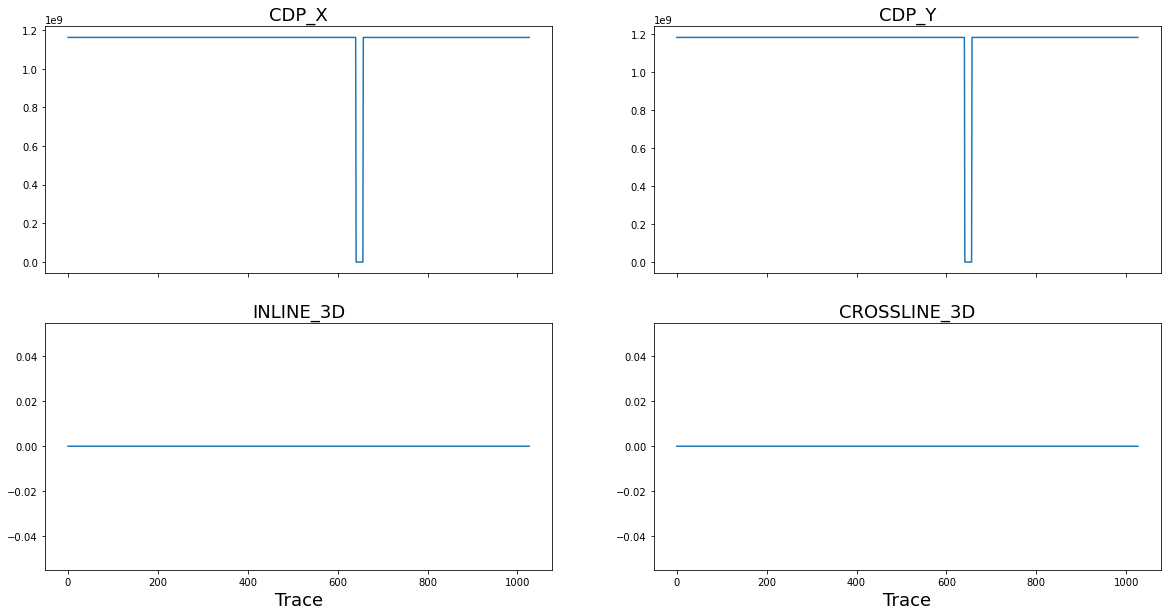

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True)

for ax, prop in zip(axs.ravel(), ["CDP_X", "CDP_Y", "INLINE_3D", "CROSSLINE_3D"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})

for ax in axs[1, :]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

In [48]:
seisnc_vol = segy_loader(sfile)

  0%|          | 0.00/1.03k [00:00<?, ? traces/s]

Loading as 2D


Converting SEGY:   0%|          | 0.00/1.03k [00:00<?, ? traces/s]

In [50]:
seisnc_vol

<xarray.Dataset>
Dimensions:  (cdp: 1027, twt: 3001)
Coordinates:
  * cdp      (cdp) int32 2000 2001 2002 2003 2004 ... 3022 3023 3024 3025 3026
  * twt      (twt) float64 0.0 1.0 2.0 3.0 ... 2.998e+03 2.999e+03 3e+03
    cdp_x    (cdp) float32 2.959e+03 2.959e+03 2.959e+03 ... 2.917e+03 2.917e+03
    cdp_y    (cdp) float32 7.021e+04 7.021e+04 7.021e+04 ... 7.019e+04 7.019e+04
Data variables:
    data     (cdp, twt) float32 -0.1619 -0.2297 -0.2029 -0.07307 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         1.0
    text:                C ARROW ENERGY\nC 2012 KOGAN 2D SEISMIC SURVEY\nC LI...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         KOGAN_SEISMIC_SURVEY_2012_KOG12-02_FINAL_MIGRATED_SD...
    srd:                 None
    datatype:            None
    percentiles:         [-7.05221152996697, -6.680694863331332, -0.982130775...
    coord_scalar:        -100.0

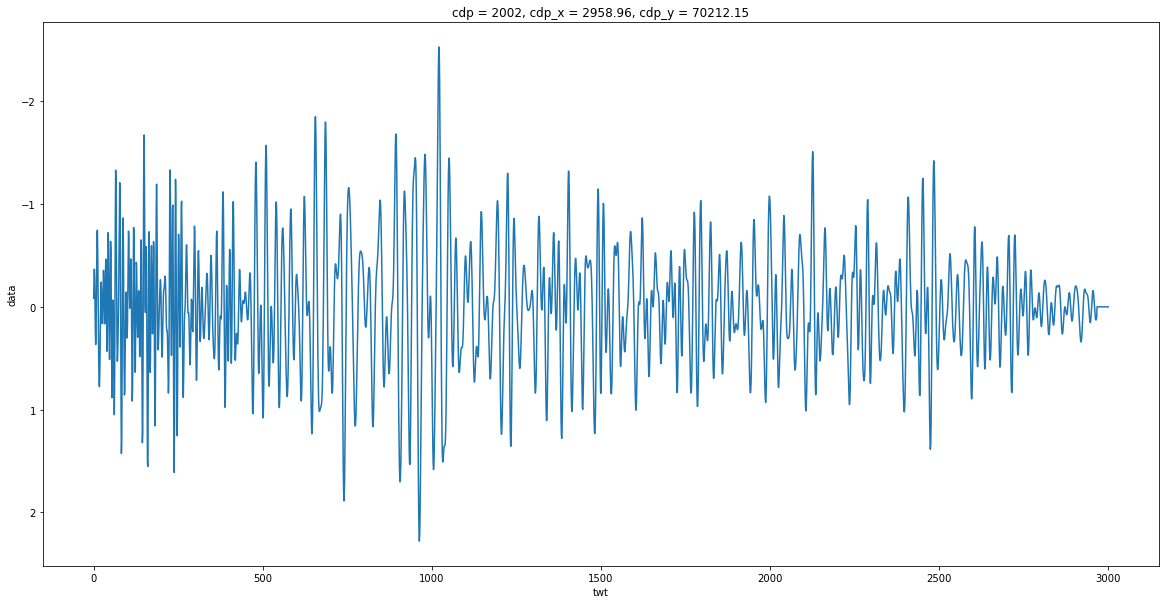

In [88]:
# lets quickly checkout our data - we'll talk about xarray basics in the next section
_ = seisnc_vol.sel(cdp=2002).data.T.plot(yincrease=False, figsize=(20, 10))